#### מגישים: אורן לוטרמן ונועם זימרן

#  מעבדה 4 - כיול מצלמה 

מטרת המעבדה היא חישוב פרמטרי המצלמה הפנימיים על ידי תצלום בודד.בדיקת יציבות הפרמטרים ואת השפעת שינוי עמדת הצילום על ערכם.

### חלק 1 -  בניית שדה כיול ותצלום

 א. תכננו שדה כיול  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from Camera import Camera
import PhotoViewer as pv
from SingleImage import SingleImage
import MatrixMethods

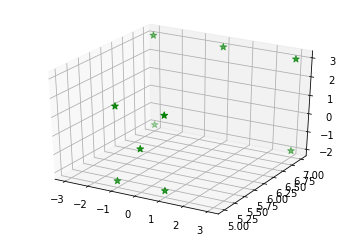

In [2]:
# Clibration field
calibration_field = np.array([[-1, 5, -2],
                              [-1, 5, 2],
                              [1, 5, 2],
                              [1, 5, -2],
                              [3, 7, -2],
                              [3, 7, 3],
                              [0, 7, 3],
                              [-3, 7, 3],
                              [-3, 7, -2],
                              [0, 5, 0]])



# draw
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(calibration_field[:, 0], calibration_field[:, 1], calibration_field[:, 2], c='g', s=50, marker='*')

plt.show()


ב. הסבירו את הבנייה שלכם, התייחסו לנקודות הבאות:
  - מספר ואופן פיזור הנקודות
  - האם השדה הוא מישורי או תלת מימדי

פיזור הנקודות הוא פיזור הקרוב להיות אחיד הנותן כיסוי של כל הפריים.
שדה הכיול צריך להכיל לפחות 6 נקודות מכיוון שיש 11 נעלמים וכל נקודה תורמת 2 משוואות.
בכל מקרה ככל שמספר הנקודות יגדל כך מספר התצפיות יגדל ונוכל לקבל פיתרון טוב יותר. כרגע פיזרנו 10 נקודות.

בחרנו ליצור שדה תלת מיימדי בכדי לקבל עומק.

ג. הגדירו מערכת מצלמה
  - הגדירו את הפרמטרים הפנימיים של המצלמה כולל עיוותים רדיאליים

In [3]:
focal_length = 35  # [mm]
sensor_size = 35  # [mm]
xp = 0.02  # [mm]
yp = 0.01  # [mm]
k1_factor = 1e-5
k2_factor = 1e-10
k1 = 5*k1_factor
k2 = 5*k2_factor
camera1 = Camera(focal_length, np.array([xp, yp]),  np.array([k1, k2]), None, None, sensor_size)

ד. הגדירו את התצלום

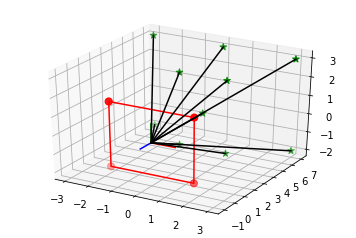

In [4]:
img1 = SingleImage(camera1)
omega = np.radians(90)
phi = 0
kappa = 0
X1 = 0  # [m]
Y1 = 0
Z1 = 0
img1.exteriorOrientationParameters = np.array([[X1, Y1, Z1, omega, phi, kappa]])


# drawing
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scale = 100
img1.drawSingleImage(calibration_field, scale, ax, 'yes')
ax.scatter(calibration_field[:, 0], calibration_field[:, 1], calibration_field[:, 2], c='g', s=50, marker='*')



ה. האם התצלום שבחרתם הוא אלכסוני/ אופקי/ אנכי?
   - הסבירו את הבחירה שלכם לערכי האוריינטציה החיצונית של התצלום

בחרנו תצלום אופקי המתאים לאופי שדה הכיול שבנינו- הממוקם על חזית.
הסיבה שבחרנו תצלום אופקי היא שזה הכי פרקטי- 
יותר קל להתרחק 10 מטר מהקיר מאשר לצלם מגובה 10 מטר

ו.  הסבירו למה האוריינטציה ושדה הכיול שנבחרו מאפשרים כיול למצלמה

ברגע שנקודות שדה הכיול ידועות היטב במערכת העולם וכן נדגמו במערכת המצלמה, ניתן לבצע את תהליך התאום ולקבל את פרמטרי הכיול

ז. ציירו את נקודות הבקרה על גבי התצלום

Ideal camera Points= 
 [[-7.00000000e+00 -1.40000000e+01]
 [-7.00000000e+00  1.40000000e+01]
 [ 7.00000000e+00  1.40000000e+01]
 [ 7.00000000e+00 -1.40000000e+01]
 [ 1.50000000e+01 -1.00000000e+01]
 [ 1.50000000e+01  1.50000000e+01]
 [ 0.00000000e+00  1.50000000e+01]
 [-1.50000000e+01  1.50000000e+01]
 [-1.50000000e+01 -1.00000000e+01]
 [ 0.00000000e+00  2.14313199e-15]]
camera Points= 
 [[-6.89403991e+00 -1.38180798e+01]
 [-6.89403991e+00  1.38380798e+01]
 [ 6.93403991e+00  1.38380798e+01]
 [ 6.93403991e+00 -1.38180798e+01]
 [ 1.47754578e+01 -9.82697187e+00]
 [ 1.46809813e+01  1.46709813e+01]
 [ 2.00000000e-02  1.48408703e+01]
 [-1.46409813e+01  1.46709813e+01]
 [-1.47354578e+01 -9.82697187e+00]
 [ 2.00000000e-02  1.00000000e-02]]


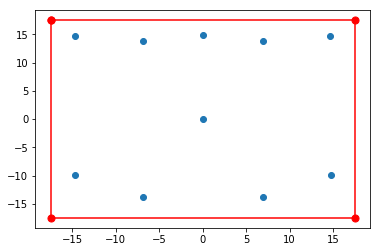

In [5]:
# sampeling points in synthetic system

# points in camera space
Ideal_camera_points = img1.GroundToImage(calibration_field)  # synthetic system
camera_points = camera1.IdealCameraToCamera(Ideal_camera_points)

print('Ideal camera Points=', '\n', Ideal_camera_points)
print('camera Points=', '\n', camera_points)

# drawing
plt.figure()
pv.drawImageFrame2D(img1.camera.sensorSize, img1.camera.sensorSize)
plt.scatter(camera_points[:, 0], camera_points[:, 1])

### חלק 2 -  כיול מצלמה

א. בתוך המחלקה Camera בנו פונקציה בשם Calibration המקבלת את הנקודות בתצלום, נקודות הבקרה בעולם, וערכים מקורבים ומחזירה את פרמטרי הכיול של המצלמה 

In [6]:
# def Calibration(self,  camera_points, groundPoints, approx_vals, image,epsilon):
#     """
#     Compute the calibration parameters
#     :param camera_points: points in camera space
#     :param groundPoints: corresponding ground points
#     :param approx_vals: approximate values
#     :param image: SingleImage instance
#     :param epsilon: tolerance for the loop

#     :type camera_points: points in camera space
#     :type groundPoints:
#     :type approx_vals:
#     :type image: SingleImage instance
#     :type epsilon: float
#     :return: calibration parameters and accuracies
#     """
#     # compute control points in camera system using the inner orientation
#     # camera_points = image.ImageToCamera(imagePoints)
#     lb = camera_points.flatten().T
#     X = approx_vals
#     dx = np.ones([11, 1]) * 100000
#     itr = 0
#     # adjustment
#     while np.linalg.norm(dx) > epsilon and itr < 100:
#         itr += 1
#         # update parameters according to approximate values
#         self.focalLength = X[0]
#         self.principalPoint = np.array([X[1], X[2]])
#         self.radial_distortions = np.array([X[3], X[4]])
#         image.exteriorOrientationParameters = X[5:]
#         l0 = self.ComputeObservationVectorForCalibration(groundPoints, camera_points ,image).T
#         L = lb - l0
#         A = self.ComputeDesignMatrixForCalibration(groundPoints, camera_points, image)
#         N = np.dot(A.T, A)
#         U = np.dot(A.T, L)
#         dx = np.dot(np.linalg.inv(N), U)
#         X = X + dx
#     # update  k1, k2
#     X[3] = X[3]*1e-5
#     X[4] = X[4]*1e-10

#     v = A.dot(dx) - L

#     # sigma posteriory
#     u = 11
#     r = len(L) - u
#     if r != 0:
#         sigma0 = ((v.T).dot(v)) / r
#         sigmaX = sigma0 * (np.linalg.inv(N))
#     else:
#         sigma0 = None
#         sigmaX = None

#     return X, sigma0, sigmaX, itr


א. כיילו את המצלמה בעזרת התצלום שהגדרתם
 -  תהליך הכיול צריך להיות מוצג באופן הדרגתי לפי השלבים שלמדנו שמעבדות קודמות
    - להתחיל מקונפיגורציה פשוטה
    - פתרון לפי מספר נעלמים העולה בצורה הדרגתית
    - פתרון עם מידת רעש שונה

לצערנו פונקצית הכיול שלנו לא מבצעת את התהליך באופן מושלם ולא הצלחנו למצוא את כל מקורות הבעיה.
הדיוקים שמתקבלים הם אפסיים שזה לא הגיוני.
דבר זה מקשה עליינו לבצע השוואה של דיוקים בין המצבים השונים.

עם זאת, ניסינו לבצע מספר הרצות-

בדיקה ראשונה נבצע כאשר פרמטרי העיוות הרדיאלי שווים לאפס:

In [7]:
# Approximate values
f = 35  # [mm]
xp2 = 0. # in camera space [mm]
yp2 = 0. # in camera space [mm]
k1 = 0.
k2 = 0.
X0 = 0
Y0 = 0
Z0 = 0
omega2 = np.radians(90)
phi2 = 0
kappa2 = 0
approx_vals = np.array([f, xp2, yp2, k1, k2, X0, Y0, Z0, omega2, phi2, kappa2]).T

focal_length = 35  # [mm]
sensor_size = 35  # [mm]
xp = 0.02  # [mm]
yp = 0.01  # [mm]
k1 = 0.
k2 = 0.
camera2 = Camera(focal_length, np.array([xp, yp]),  np.array([k1, k2]), None, None, sensor_size)

img2 = SingleImage(camera2)
omega = np.radians(90)
phi = 0
kappa = 0
X1 = 0  
Y1 = 0
Z1 = 0
img2.exteriorOrientationParameters = np.array([[X1, Y1, Z1, omega, phi, kappa]])

# points in camera space
Ideal_camera_points2 = img2.GroundToImage(calibration_field)  # synthetic system
camera_points2 = camera2.IdealCameraToCamera(Ideal_camera_points2)

calibration_params, sigma0, sigmaX, itr = camera2.Calibration(camera_points2, calibration_field, approx_vals, img2, 0.001)
calibration_params[8:] = np.degrees(calibration_params[8:])

accuracy = np.diag(sigmaX)
print('iteration','\n',itr)
print('Accuracy norm','\n',np.linalg.norm(accuracy))
MatrixMethods.PrintMatrix(calibration_params, 'calibration parameters', 10)
MatrixMethods.PrintMatrix(accuracy,'Accuracy',10)

iteration 
 2
Accuracy norm 
 5.436105963228715e-21
calibration parameters
   dimensions:  11 by 1
35.0000000000	
0.0200000000	
0.0100000000	
-0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	
90.0000000000	
-0.0000000000	
-0.0000000000	

Accuracy
   dimensions:  11 by 1
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	



ניתן לראות שקיבלנו את הפרמטרים שלהם ציפינו אך ללא שגיאה. לא הצלחנו לעלות על הסיבה למה מתקבלים דיוקים אפסיים.

 כעת נבצע הרצה עם הוספת פרמטרי העיוות הרדיאלי כפי שהגדרנו אותם בחלק א

In [8]:
calibration_params, sigma0, sigmaX, itr = camera1.Calibration(camera_points, calibration_field, approx_vals, img1, 0.001)
calibration_params[8:] = np.degrees(calibration_params[8:])

accuracy = np.diag(sigmaX)
print('iteration','\n',itr)
print('Accuracy norm','\n',np.linalg.norm(accuracy))
MatrixMethods.PrintMatrix(calibration_params, 'calibration parameters', 10)
MatrixMethods.PrintMatrix(accuracy,'Accuracy',10)

iteration 
 7
Accuracy norm 
 5.205380699040563e-10
calibration parameters
   dimensions:  11 by 1
34.9977860333	
0.0199999955	
0.0099999981	
0.0000493612	
0.0000000099	
0.0000000001	
-0.0000110058	
0.0000000001	
89.9999999953	
0.0000000095	
0.0000000001	

Accuracy
   dimensions:  11 by 1
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000005	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	



ניתן לראות שגם עבור הרצה זו קיבלנו את הפרמטרים להם ציפינו 
למעט k2
שעבורו קיבלנו ערך מעט שונה, אך בסדר גודל דומה.
כמו כן, מבדיקה של הנורמה על הדיוקים ניתן לראות שהם פחות טובים לאחר הכנסת ערך  עבור פרמטרי העיוות הרדיאלי.

נבדוק שינוי אוריינטציה

In [9]:
focal_length = 35  # [mm]
sensor_size = 35  # [mm]
xp = 0.02  # [mm]
yp = 0.01  # [mm]
k1_factor = 1e-5
k2_factor = 1e-10
k1 = 5*k1_factor
k2 = 5*k2_factor
camera1 = Camera(focal_length, np.array([xp, yp]), np.array([k1, k2]), None, None, sensor_size)

img1 = SingleImage(camera1)
omega = np.radians(60)
phi = 0
kappa = 0
X1 = 0  # [m]
Y1 = 0
Z1 = 5
img1.exteriorOrientationParameters = np.array([[X1, Y1, Z1, omega, phi, kappa]])

# points in camera space
Ideal_camera_points = img1.GroundToImage(calibration_field)  # synthetic system
camera_points = camera1.IdealCameraToCamera(Ideal_camera_points)

calibration_params, sigma0, sigmaX, itr = camera1.Calibration(camera_points, calibration_field, approx_vals, img1, 0.001)
calibration_params[8:] = np.degrees(calibration_params[8:])
accuracy = np.diag(sigmaX)
print('iteration','\n',itr)
print('Accuracy norm','\n',np.linalg.norm(accuracy))
MatrixMethods.PrintMatrix(calibration_params, 'calibration parameters', 10)
MatrixMethods.PrintMatrix(accuracy,'Accuracy',10)


iteration 
 100
Accuracy norm 
 0.394187854937396
calibration parameters
   dimensions:  11 by 1
35.0010312288	
0.0200000000	
0.0100607498	
0.0000500568	
0.0000000084	
0.0000000000	
-0.0001375732	
5.0000790715	
60.0001035245	
0.0000000000	
0.0000000000	

Accuracy
   dimensions:  11 by 1
0.0000000195	
0.0000000001	
0.0000000001	
0.0000053445	
0.3941878549	
0.0000000000	
0.0000000002	
0.0000000001	
0.0000000000	
0.0000000000	
0.0000000000	



ניתן לראות שהדיוקים שהתקבלו פחות טובים מאשר מצב אופקי

נבצע בדיקה עבור שדות כיול עם מספר שונה של נקודות ונבדוק את ההבדל בדיוקים המתקבלים:

בשדה הכיול הראשוני היו 10 נקודות.
כעת נבדוק שדה ובו 15 נקודות:

In [10]:
#new Clibration field- 15 points
calibration_field = np.array([[-1, 5, -2],
                              [-1, 5, 2],
                              [1, 5, 2],
                              [1, 5, -2],
                              [3, 7, -2],
                              [3, 7, 3],
                              [0, 7, 3],
                              [-3, 7, 3],
                              [-3, 7, -2],
                              [0, 5, 0],
                              [2, 7, -1],
                              [2, 7, 3],
                              [0, 7, 3],
                              [-2, 7, 3],
                              [-2, 7, -1]])

focal_length = 35  # [mm]
sensor_size = 35  # [mm]
xp = 0.02  # [mm]
yp = 0.01  # [mm]
k1_factor = 1e-5
k2_factor = 1e-10
k1 = 5*k1_factor
k2 = 5*k2_factor
camera1 = Camera(focal_length, np.array([xp, yp]), np.array([k1, k2]), None, None, sensor_size)

img1 = SingleImage(camera1)
omega = np.radians(90)
phi = 0
kappa = 0
X1 = 0  # [m]
Y1 = 0
Z1 = 0
img1.exteriorOrientationParameters = np.array([[X1, Y1, Z1, omega, phi, kappa]])

# points in camera space
Ideal_camera_points = img1.GroundToImage(calibration_field)  # synthetic system
camera_points = camera1.IdealCameraToCamera(Ideal_camera_points)

calibration_params, sigma0, sigmaX, itr = camera1.Calibration(camera_points, calibration_field, approx_vals, img1, 0.001)
calibration_params[8:] = np.degrees(calibration_params[8:])
accuracy = np.diag(sigmaX)
print('iteration','\n',itr)
print('Accuracy norm','\n',np.linalg.norm(accuracy))
MatrixMethods.PrintMatrix(calibration_params, 'calibration parameters', 10)
MatrixMethods.PrintMatrix(accuracy,'Accuracy',10)

iteration 
 6
Accuracy norm 
 0.07400688005106934
calibration parameters
   dimensions:  11 by 1
34.9989327931	
0.0199998955	
0.0100133026	
0.0000495287	
0.0000000097	
0.0000000011	
-0.0000452295	
-0.0000067175	
90.0000880513	
0.0000001962	
0.0000000048	

Accuracy
   dimensions:  11 by 1
0.0000000089	
0.0000000022	
0.0000000018	
0.0000026887	
0.0740068800	
0.0000000000	
0.0000000001	
0.0000000000	
0.0000000000	
0.0000000000	
0.0000000000	



In [11]:
#new Clibration field- 7 points
calibration_field = np.array([[-1, 5, -2],
                              [-1, 5, 2],
                              [1, 5, 2],
                              [1, 5, -2],
                              [3, 7, 3],
                              [-3, 7, 3],
                              [0, 5, 0]])

focal_length = 35  # [mm]
sensor_size = 35  # [mm]
xp = 0.02  # [mm]
yp = 0.01  # [mm]
k1_factor = 1e-5
k2_factor = 1e-10
k1 = 5*k1_factor
k2 = 5*k2_factor
camera1 = Camera(focal_length, np.array([xp, yp]), np.array([k1, k2]), None, None, sensor_size)

img1 = SingleImage(camera1)
omega = np.radians(90)
phi = 0
kappa = 0
X1 = 0  # [m]
Y1 = 0
Z1 = 0
img1.exteriorOrientationParameters = np.array([[X1, Y1, Z1, omega, phi, kappa]])

# points in camera space
Ideal_camera_points = img1.GroundToImage(calibration_field)  # synthetic system
camera_points = camera1.IdealCameraToCamera(Ideal_camera_points)

calibration_params, sigma0, sigmaX, itr = camera1.Calibration(camera_points, calibration_field, approx_vals, img1, 0.001)
calibration_params[8:] = np.degrees(calibration_params[8:])
accuracy = np.diag(sigmaX)
print('iteration','\n',itr)
print('Accuracy norm','\n',np.linalg.norm(accuracy))
MatrixMethods.PrintMatrix(calibration_params, 'calibration parameters', 10)
MatrixMethods.PrintMatrix(accuracy,'Accuracy',10)

iteration 
 100
Accuracy norm 
 110081098523.86443
calibration parameters
   dimensions:  11 by 1
31.7068946958	
0.0200000000	
0.0100010242	
0.0000432837	
-0.0000001811	
-0.0000000000	
0.4141307240	
-0.0000000165	
90.0000003670	
0.0000000000	
-0.0000000000	

Accuracy
   dimensions:  11 by 1
-69063.5765120742	
0.0000000039	
-0.0000000013	
12504103.1045976449	
110081097813.6726989746	
0.0000000000	
-2500.4875677847	
0.0000000001	
0.0000000000	
0.0000000000	
0.0000000000	



מסיבה לא ברורה התאום לא מתכנס לנו במצב זה.
באופו כללי - 
ניתן לראות בברור שיש תקלה בקוד סביב ערכי K1, K2 ודיוקיהם.
לכן קשה לבצע השוואות אמינות בין המצבים השונים. 

ג. הסבירו את התשובות שקיבלתם בתהליך הכיול שבניתם
  - התתייחסו לדברים הבאים:
    - הבנייה של שדה הכיול
    - אויינטציה של התצלום
    - מספר הנעלמים בתהליך ודיוקם

בתהליך הכיול שלנו יש תקלה שלא הצלחנו לפתור גם לאחר שעות רבות.
מתוך התבוננות בנתונים אנחנו מניחים שהבעיה היא סביב פרמטרי העיוות הרדיאלי- K1,K2.

בכל מקרה ניסינו לבצע מספר בדיקות הכוללות שינוי באוריינטציה, ושינוי מספר נקודות הבקרה. בגלל התוצאות הבעייתיות קשה להסיק מסקנה אמינה לגבי ההשפעות של המצבים השונים על תהליך הכיול.

בדיקות נוספות שהיינו מעוניינים לבצע הן שדה כיול אופקי לעומת שדה כיול עם עומק, בדיקת קונפיגורציות מצלמה נוספות וכן בדיקה של הכיול לאחר הוספת רעשים.
לצערנו לא ראינו טעם להרצות אלה בגלל הפגמים בתהליך התאום שלנו.

In [12]:
!jupyter nbconvert  Lab4_CameraCalibration.ipynb --to html

[NbConvertApp] Converting notebook Lab4_CameraCalibration.ipynb to html
[NbConvertApp] Writing 419226 bytes to Lab4_CameraCalibration.html
